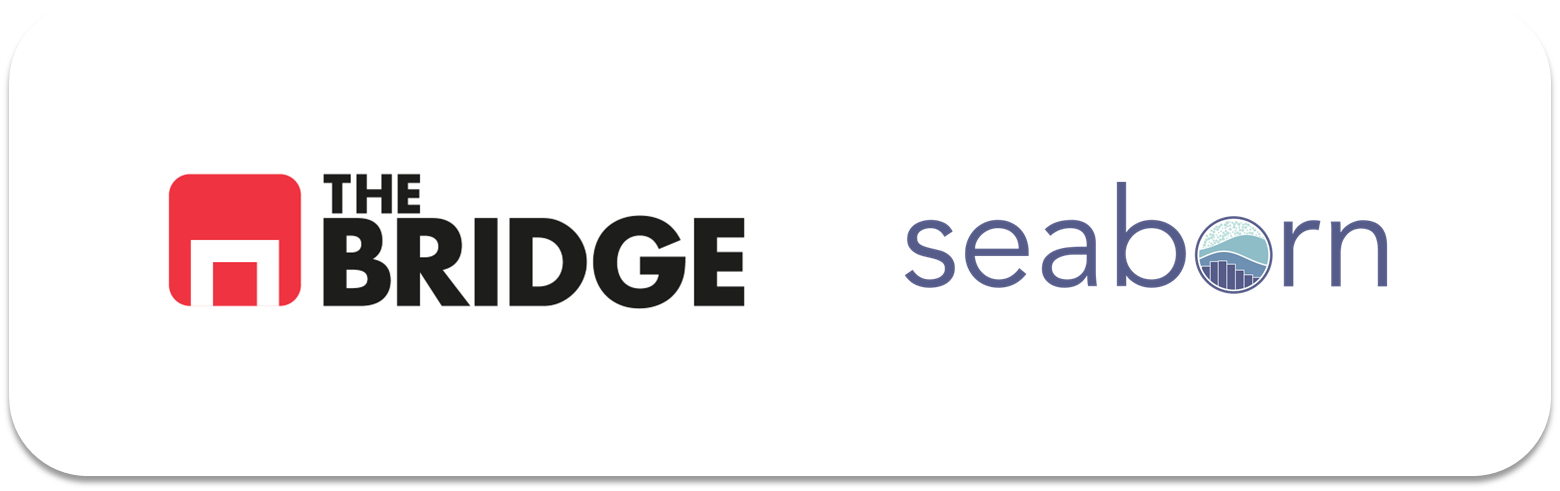

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from bootcampviztools import pinta_distribucion_categoricas, plot_combined_graphs

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [104]:
df_cities = pd.read_csv("./data/california_cities.csv")
df_cities = df_cities.dropna()
df_cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [105]:
def pintar_dispersion(df, col_x, col_y, col_cat=None, tamano_puntos=100, escala = 1, leyenda_tipo="legend"):
    """
    Genera un diagrama de dispersión de dos variables numéricas, con opción de tamaño dinámico y código de colores.

    Parámetros:
    - df: DataFrame de pandas.
    - col_x: Nombre de la columna numérica para el eje X.
    - col_y: Nombre de la columna numérica para el eje Y.
    - col_cat: Nombre de la columna categórica para diferenciar colores
    - tamaño_puntos: Tamaño de los puntos o columna del DataFrame cuyos valores van a controlar el tamaño.
    - escala: Factor de escala para modificar el tamaño si "tamano_puntos" es una columna.
    - leyenda_tipo: "legend" para una leyenda estándar y "colorbar" para una barra de color

    Retorna:
    - Un gráfico de dispersión visualmente detallado.
    """
    
    plt.figure(figsize=(10, 6))

    if isinstance(tamano_puntos, str):
        tamano_puntos=df[tamano_puntos]*escala

    if col_cat:
        # Si hay columna categórica, asignamos colores
        scatter=sns.scatterplot(x=df[col_x], y=df[col_y], hue=df[col_cat], size=tamano_puntos, palette="viridis", alpha=0.7)
    else:
        # Si no hay columna categórica, omitimos el parámetro de color
        sns.scatterplot(x=df[col_x], y=df[col_y], size=tamano_puntos, alpha=0.7)

    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Diagrama de dispersión de {col_x} vs {col_y}')
    
    if leyenda_tipo=="colorbar" and col_cat:
        plt.colorbar(scatter.collections[0])
    else:
        plt.legend(title=col_cat if col_cat else "Datos")



### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

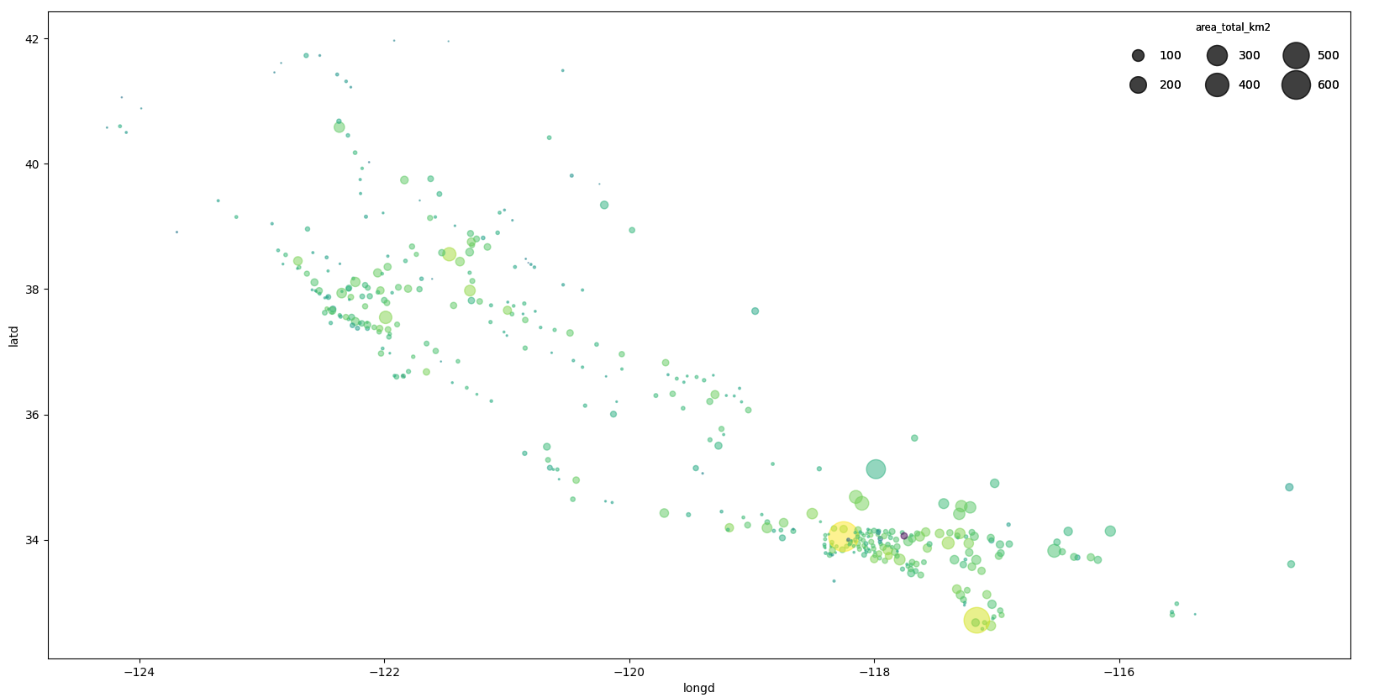

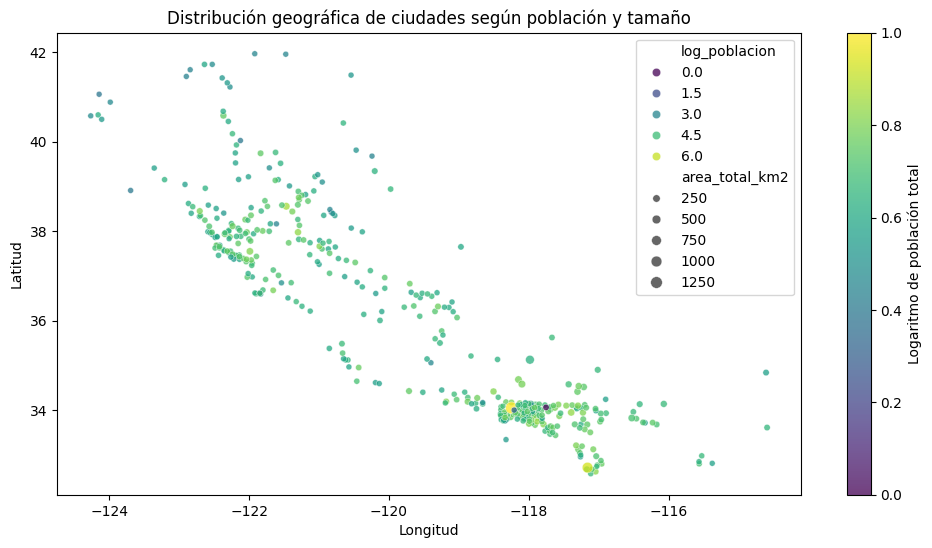

In [106]:
# Crear la nueva columna con el logaritmo decimal de la población
df_cities["log_poblacion"] = np.log10(df_cities["population_total"])

# Generar la visualización
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    x=df_cities["longd"],
    y=df_cities["latd"],
    size=df_cities["area_total_km2"],  # Tamaño según área de la ciudad
    hue=df_cities["log_poblacion"],    # Color según población en escala logarítmica
    palette="viridis", alpha=0.75
)

# Ajustes del gráfico
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Distribución geográfica de ciudades según población y tamaño")

# Extra: Configurar una barra de color si quieres visualizar la escala de población
cbar = plt.colorbar(scatter.collections[0])
cbar.set_label("Logaritmo de población total")

plt.show()

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [107]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [108]:
#Vamos a comparar la tasa de mortalidad según la clase en la viajaban los pasajeros y según fueran hombres o mujeres:
df_titanic .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [109]:
#Voy a utilizar survived (que no tiene nulos) para ver las tasas de mortalidad totales del accidente. 
#Voy a utilizar tambien "who" (que no tiene nulos) para calcular la distribución según son mujeres, niños y hombres y verificar la afirmación.
#"class" también estaría completo y sin nulos.
#Si quisiera utilizar "alive" también estaría completo.
#"fare" para ver la influencia de los precios de los pasajes.
# Conclusión, para lo que me hace falta no necesito limpiar el DataFrame


1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

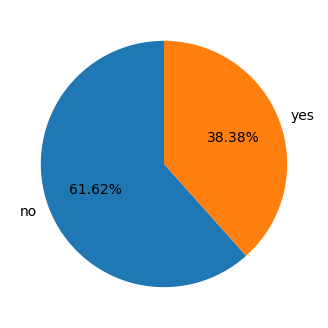

In [110]:
#Lo puedo hacer con un diagrama de tarta porque es mucho más visual y menos complicado de entender
data = df_titanic["alive"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values,
        labels=data.index,
        autopct='%.2f%%', startangle= 90);

Ciertamente, más del 60% de los pasajeros murieron. El análisis de datos apoya la afirmación.

Ahora hay que investigar la mortalidad según mujeres, hombres y niños

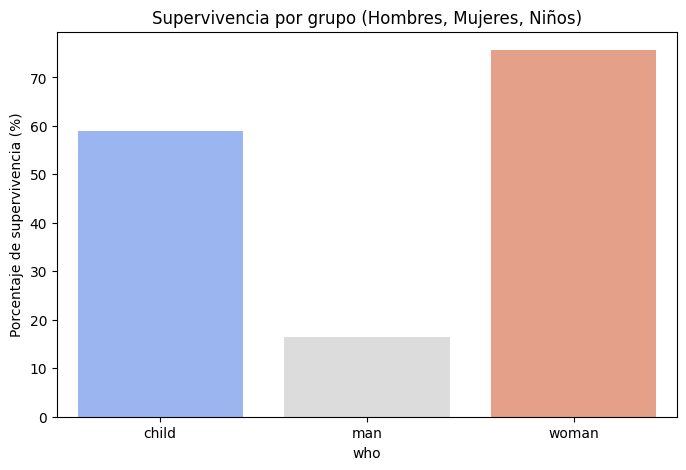

In [111]:
# Calcular tasas de supervivencia por grupo (según la columna "who")
supervivencia_por_grupo = df_titanic.groupby("who")["survived"].mean() * 100

# Visualización del gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=supervivencia_por_grupo.index, y=supervivencia_por_grupo.values, hue=supervivencia_por_grupo.index, palette="coolwarm", legend=False)

plt.ylabel("Porcentaje de supervivencia (%)")
plt.title("Supervivencia por grupo (Hombres, Mujeres, Niños)")
plt.show()

Efectivamente, las mujeres y los niños sobrevivieron sustancialmente más que los hombres.


Supervivientes según clase social

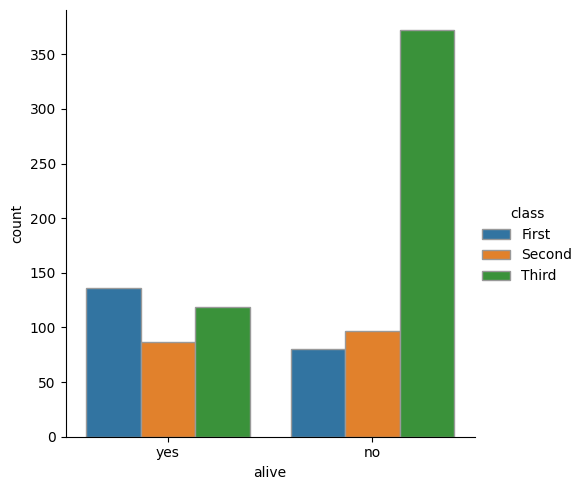

In [112]:
#### Tablas de frecuencias absolutas
sns.catplot(x="alive",
            hue="class", #colores según la clase
            kind="count", #me permite diferentes tipos de gráficos sobre variables
            edgecolor=".6",
            orient="V",
            data=df_titanic.sort_values("class"));

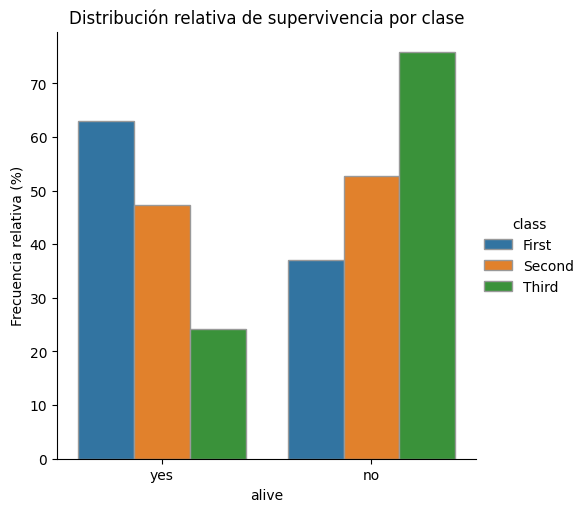

In [113]:
df_frecuencia_relativa = df_titanic.groupby("class")["alive"].value_counts(normalize=True).reset_index()
df_frecuencia_relativa.rename(columns={"proportion": "frecuencia_relativa"}, inplace=True)

#convertir a porcentaje
df_frecuencia_relativa["frecuencia_relativa"] = df_frecuencia_relativa.groupby("class")["frecuencia_relativa"].transform(lambda x: (x/x.sum())*100)
sns.catplot(x="alive", y="frecuencia_relativa", hue="class", kind="bar", edgecolor=".6", orient="v", data=df_frecuencia_relativa)


plt.ylabel("Frecuencia relativa (%)")
plt.title("Distribución relativa de supervivencia por clase")
plt.show()


Este es más intuitivo con el porcentaje. Así se ve bien que la supervivencia fue mucho más acusada en la gente de primera clase y que la gente de tercera murió más, independientemente del sexo o la edad.

Ahora debemos ver la mortalidad de mujeres, hombres y niños según clase social

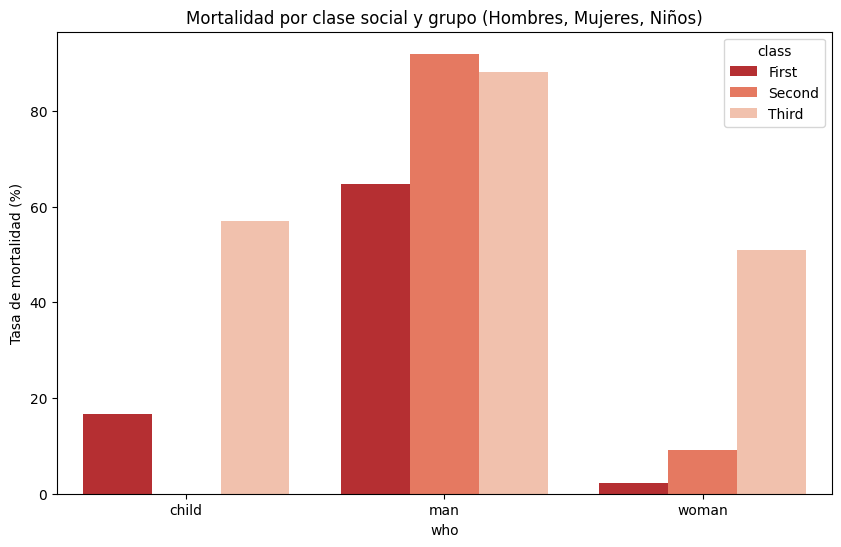

In [114]:
# Calcular tasas de mortalidad (1 - tasa de supervivencia)
mortalidad_por_grupo_clase = df_titanic.groupby(["who", "class"])["survived"].mean()
mortalidad_por_grupo_clase = (1 - mortalidad_por_grupo_clase) * 100  # Convertir a porcentaje
mortalidad_por_grupo_clase = mortalidad_por_grupo_clase.reset_index()

# Gráfico de barras de mortalidad
plt.figure(figsize=(10, 6))
sns.barplot(x="who", y="survived", hue="class", data=mortalidad_por_grupo_clase, palette="Reds_r")

plt.ylabel("Tasa de mortalidad (%)")
plt.title("Mortalidad por clase social y grupo (Hombres, Mujeres, Niños)")
plt.show()

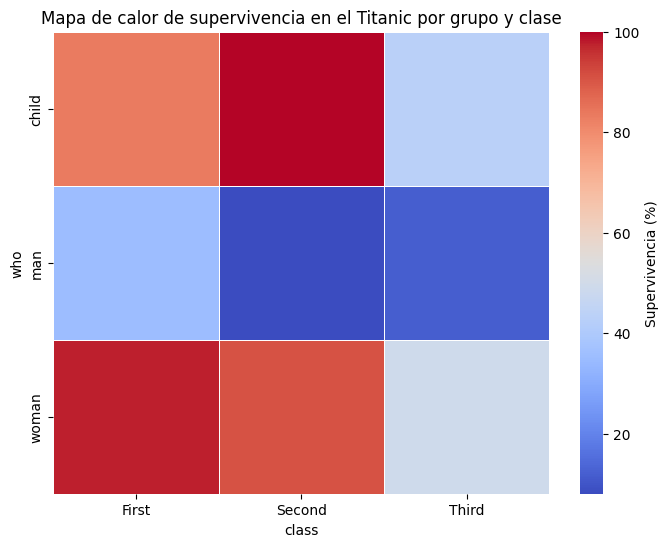

In [115]:
#Diagrama de mosaico conjunto:

# Crear tabla de supervivencia (convertida a porcentaje)
tabla_supervivencia = df_titanic.pivot_table(index="who", columns="class", values="survived", aggfunc="mean") * 100

# Graficar mapa de calor SIN números dentro
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_supervivencia, cmap="coolwarm", annot=False, linewidths=0.5, cbar_kws={"label": "Supervivencia (%)"})

plt.title("Mapa de calor de supervivencia en el Titanic por grupo y clase")
plt.show()

En el mapa de calor se ve muy fácilmente que los niños de segunda clase sobrevivieron al 100%, concuerda con el gráfico que decía que la mortalidad de niños en segunda clase era de 0.
Por otro lado, las mujeres de primera clase también alcanzaron altas tasas de supervivencia.

En una superviviencia media-alta se encuetnran el segmento de los niños de primera  clase y las mujeres de segunda clase. 
Los hombres de cualquier clase, especialmente de segunda y tercera clase y todas las personas de tercera clase ostentan tasas de supervivencia bajas o muy bajas.

Según coste del billete:

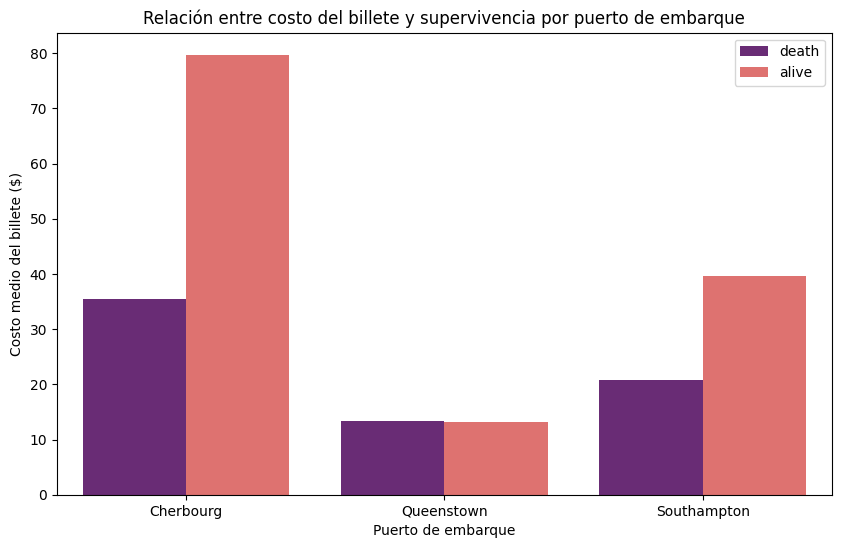

In [116]:
# Agrupar el costo del billete por puerto y estado de supervivencia
fare_por_embarque = df_titanic.groupby(["embark_town", "survived"])["fare"].mean().reset_index()

# Reemplazar valores en "Survived" para que la leyenda muestre "death" y "alive"
fare_por_embarque["survived"] = fare_por_embarque["survived"].map({0: "death", 1: "alive"})

# Graficar barras agrupadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="embark_town", y="fare", hue="survived", data=fare_por_embarque, palette="magma")

plt.ylabel("Costo medio del billete ($)")
plt.xlabel("Puerto de embarque")
plt.title("Relación entre costo del billete y supervivencia por puerto de embarque")

# Quitar el título de la leyenda para que solo aparezcan "death" y "alive"
ax.legend(title="")

plt.show()

El coste del billete parece ser influencia. Los pasajeros que pagaron menos de 30 libras fallecieron en su gran mientras que los que pagaron más de 40, la mitad aproximadamente que embarcó en Cerbourg sobrevivió y una cierta parate de los que embarcaron en Southhampton.